In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_df1 = pd.read_csv("/content/drive/MyDrive/AAA_IR/train_data.txt", delimiter=":::", engine="python", names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
movie_df2 = pd.read_csv("/content/drive/MyDrive/AAA_IR/test_data_solution.txt", delimiter=":::", engine="python", names=["ID", "TITLE", "GENRE", "DESCRIPTION"])

movie_genre_df = pd.concat([movie_df1, movie_df2], ignore_index=True)

In [3]:
movie_df1.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
movie_df2.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [5]:
movie_genre_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
movie_df1.info()
print("\n")
movie_df2.info()
print("\n")
movie_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108414 entries, 0 to 108413
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   -

In [7]:
print(movie_genre_df.isnull().sum())
print("\n")
print(movie_genre_df.isna().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [8]:
movie_genre_df["YEAR"] = movie_genre_df["TITLE"].str.extract(r"\((\d{4})\)")

In [9]:
movie_genre_df.isna().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,0
YEAR,8732


In [10]:
print(movie_genre_df["GENRE"].value_counts())

GENRE
drama           27225
documentary     26192
comedy          14893
short           10145
horror           4408
thriller         3181
action           2629
western          2064
reality-tv       1767
family           1567
adventure        1550
music            1462
romance          1344
sci-fi           1293
adult            1180
crime            1010
animation         996
sport             863
talk-show         782
fantasy           645
mystery           637
musical           553
biography         529
history           486
game-show         387
news              362
war               264
Name: count, dtype: int64


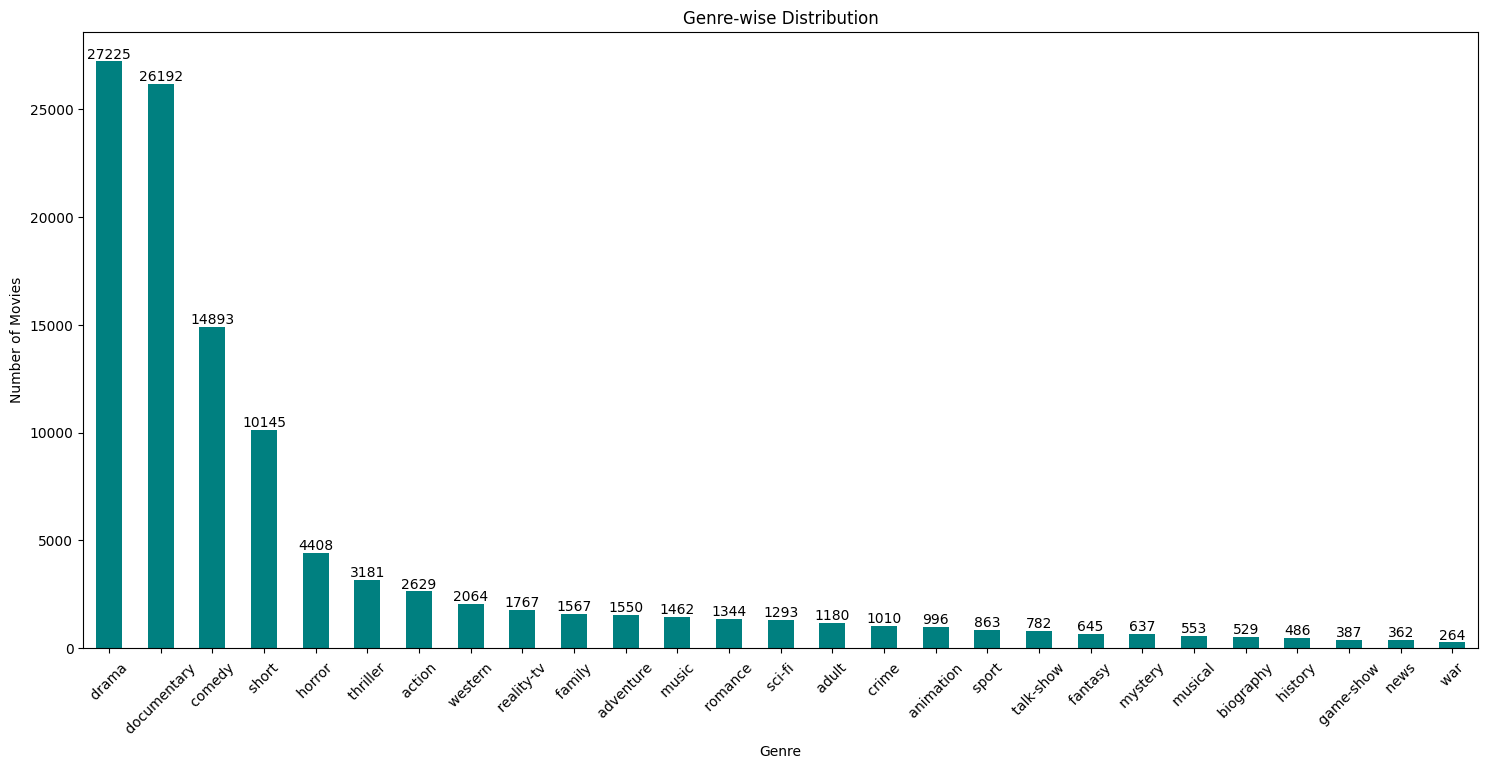

In [11]:
genre_counts = movie_genre_df["GENRE"].value_counts()

plt.figure(figsize=(18, 8))
genre_counts.plot(kind="bar", color="teal")
plt.title("Genre-wise Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)

for index, value in enumerate(genre_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.show()

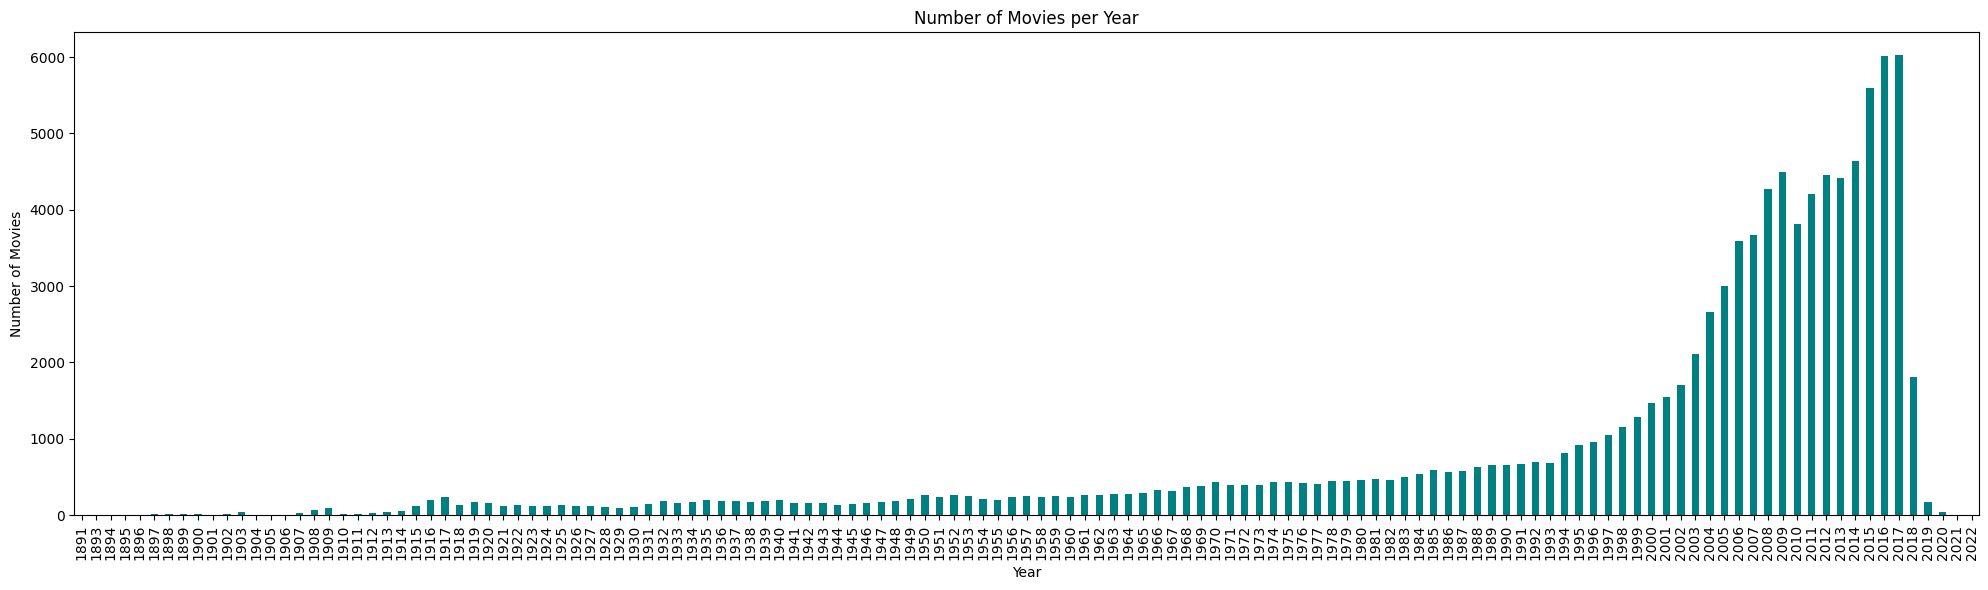

In [12]:
movies_per_year = movie_genre_df["YEAR"].value_counts().sort_index()

plt.figure(figsize=(20, 6))
movies_per_year.plot(kind="bar", color="teal")

plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 2000x400 with 0 Axes>

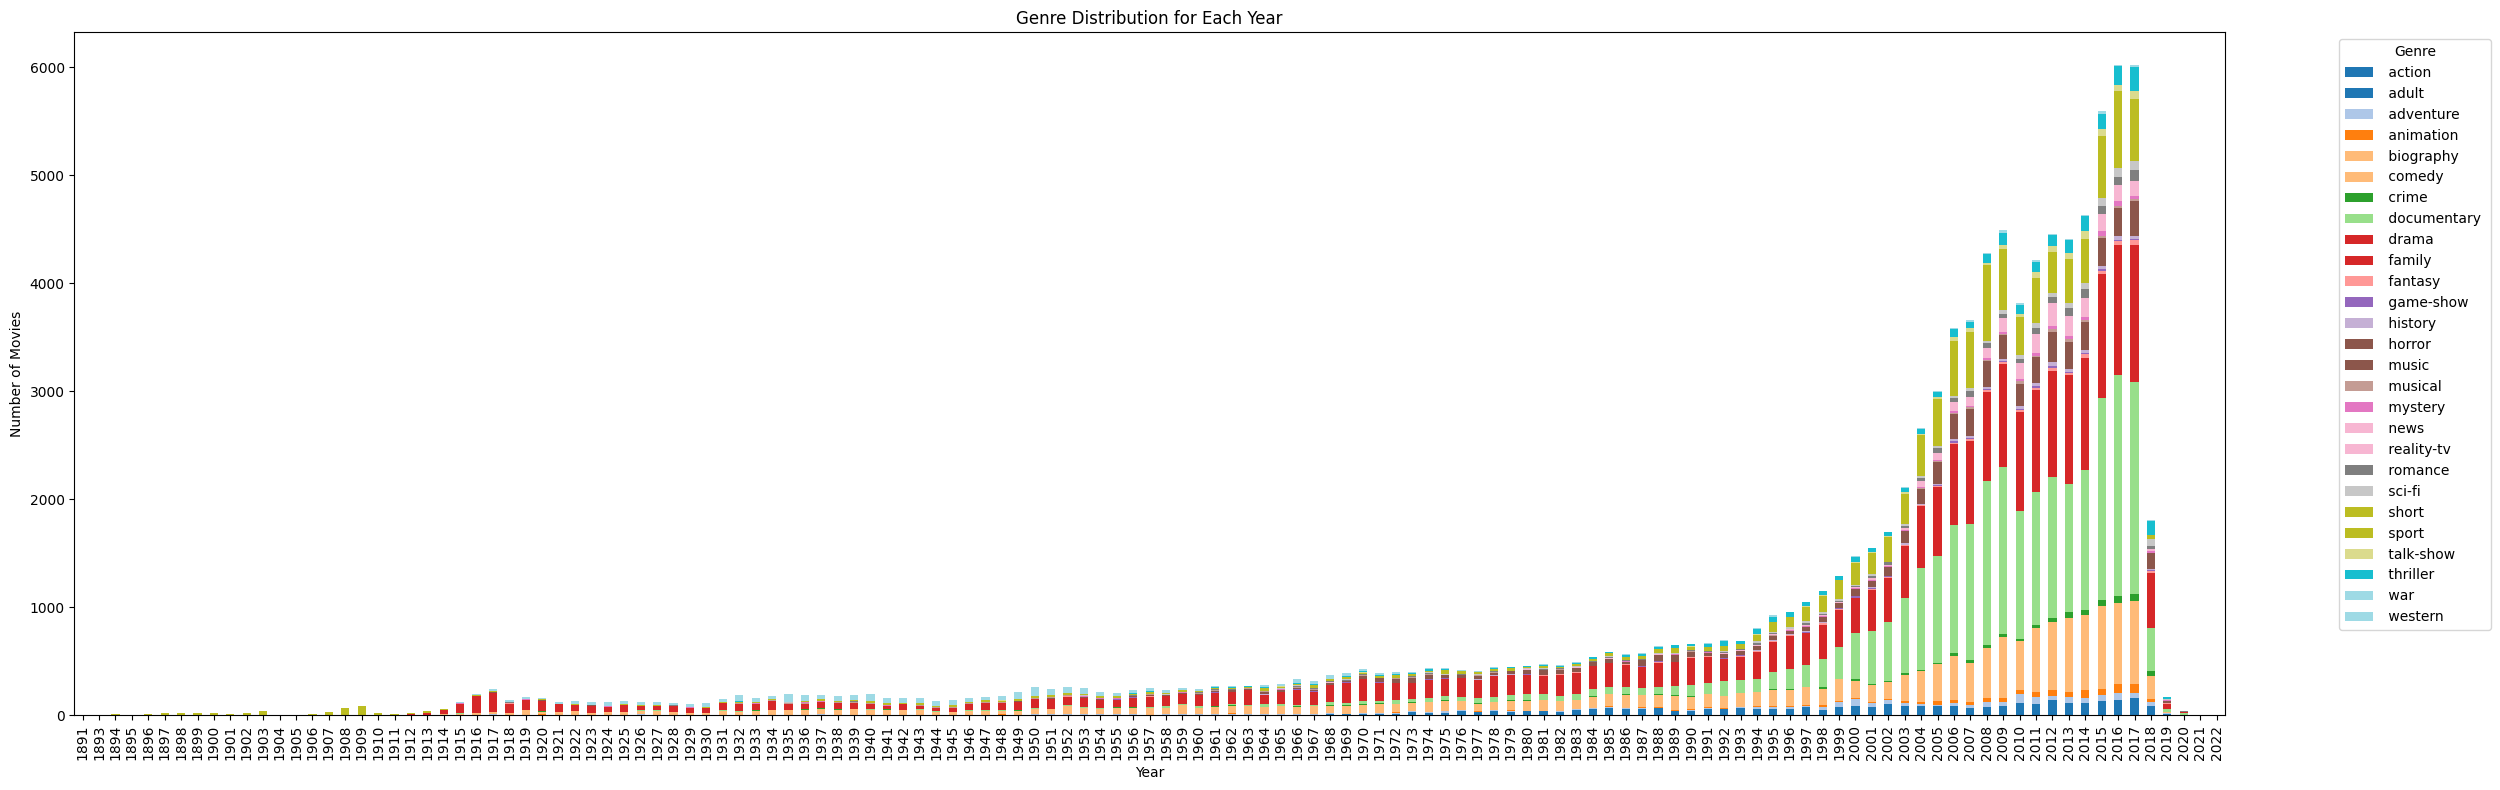

In [13]:
genre_year_counts = movie_genre_df.groupby(["YEAR", "GENRE"]).size().unstack(fill_value=0)

plt.figure(figsize=(20, 4))
genre_year_counts.plot(kind="bar", stacked=True, colormap="tab20", figsize=(25, 8))

plt.title("Genre Distribution for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return ''.join([char for char in text if not char.isdigit()])

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word.lower() not in stop_words]

def stem_text(text):
    return [stemmer.stem(word) for word in text]

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
movie_genre_df['DESCRIPTION_CLEAN'] = movie_genre_df['DESCRIPTION'].apply(remove_punctuation)
movie_genre_df['DESCRIPTION_CLEAN'] = movie_genre_df['DESCRIPTION_CLEAN'].apply(remove_numbers)
movie_genre_df['TOKENS'] = movie_genre_df['DESCRIPTION_CLEAN'].apply(nltk.word_tokenize)
movie_genre_df['DESCRIPTION_NO_STOPWORDS'] = movie_genre_df['TOKENS'].apply(remove_stopwords)
movie_genre_df['STEMMED_WORDS'] = movie_genre_df['DESCRIPTION_NO_STOPWORDS'].apply(stem_text)
movie_genre_df['LEMMATIZED_WORDS'] = movie_genre_df['DESCRIPTION_NO_STOPWORDS'].apply(lemmatize_text)
movie_genre_df['LEMMATIZED_DESCRIPTION'] = movie_genre_df['LEMMATIZED_WORDS'].apply(lambda x: ' '.join(x))

In [16]:
movie_genre_df

,ID,TITLE,GENRE,DESCRIPTION,YEAR,DESCRIPTION_CLEAN,TOKENS,DESCRIPTION_NO_STOPWORDS,STEMMED_WORDS,LEMMATIZED_WORDS,LEMMATIZED_DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,2009,Listening in to a conversation between his do...,"[Listening, in, to, a, conversation, between, ...","[Listening, conversation, doctor, parents, yea...","[listen, convers, doctor, parent, yearold, osc...","[Listening, conversation, doctor, parent, year...",Listening conversation doctor parent yearold O...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1997,A brother and sister with a past incestuous r...,"[A, brother, and, sister, with, a, past, inces...","[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestu, relationship,...","[brother, sister, past, incestuous, relationsh...",brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1980,As the bus empties the students for their fie...,"[As, the, bus, empties, the, students, for, th...","[bus, empties, students, field, trip, Museum, ...","[bu, empti, student, field, trip, museum, natu...","[bus, empty, student, field, trip, Museum, Nat...",bus empty student field trip Museum Natural Hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1915,To help their unemployed father make ends mee...,"[To, help, their, unemployed, father, make, en...","[help, unemployed, father, make, ends, meet, E...","[help, unemploy, father, make, end, meet, edit...","[help, unemployed, father, make, end, meet, Ed...",help unemployed father make end meet Edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,2007,The films title refers not only to the unreco...,"[The, films, title, refers, not, only, to, the...","[films, title, refers, unrecovered, bodies, gr...","[film, titl, refer, unrecov, bodi, ground, zer...","[film, title, refers, unrecovered, body, groun...",film title refers unrecovered body ground zero...
...,...,...,...,...,...,...,...,...,...,...,...
108409,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da...",2013,Covering multiple genres Tales of Light Dark...,"[Covering, multiple, genres, Tales, of, Light,...","[Covering, multiple, genres, Tales, Light, Dar...","[cover, multipl, genr, tale, light, dark, anth...","[Covering, multiple, genre, Tales, Light, Dark...",Covering multiple genre Tales Light Dark antho...
108410,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...,1965,As Alice and Cora Munro attempt to find their...,"[As, Alice, and, Cora, Munro, attempt, to, fin...","[Alice, Cora, Munro, attempt, find, father, Br...","[alic, cora, munro, attempt, find, father, bri...","[Alice, Cora, Munro, attempt, find, father, Br...",Alice Cora Munro attempt find father British o...
108411,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...,2007,A movie years in the making Oliver Twist the...,"[A, movie, years, in, the, making, Oliver, Twi...","[movie, years, making, Oliver, Twist, Artful, ...","[movi, year, make, oliv, twist, art, dodger, f...","[movie, year, making, Oliver, Twist, Artful, D...",movie year making Oliver Twist Artful Dodger F...
108412,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard...",1973,Popular but mysterious rock DJ Mike Mallard A...,"[Popular, but, mysterious, rock, DJ, Mike, Mal...","[Popular, mysterious, rock, DJ, Mike, Mallard,...","[popular, mysteri, rock, dj, mike, mallard, as...","[Popular, mysterious, rock, DJ, Mike, Mallard,...",Popular mysterious rock DJ Mike Mallard Askew ...


In [17]:
comparison_df = movie_genre_df[['DESCRIPTION_NO_STOPWORDS','STEMMED_WORDS', 'LEMMATIZED_WORDS']].head(10)
comparison_df

,DESCRIPTION_NO_STOPWORDS,STEMMED_WORDS,LEMMATIZED_WORDS
0,"[Listening, conversation, doctor, parents, yea...","[listen, convers, doctor, parent, yearold, osc...","[Listening, conversation, doctor, parent, year..."
1,"[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestu, relationship,...","[brother, sister, past, incestuous, relationsh..."
2,"[bus, empties, students, field, trip, Museum, ...","[bu, empti, student, field, trip, museum, natu...","[bus, empty, student, field, trip, Museum, Nat..."
3,"[help, unemployed, father, make, ends, meet, E...","[help, unemploy, father, make, end, meet, edit...","[help, unemployed, father, make, end, meet, Ed..."
4,"[films, title, refers, unrecovered, bodies, gr...","[film, titl, refer, unrecov, bodi, ground, zer...","[film, title, refers, unrecovered, body, groun..."
5,"[Quality, Control, consists, series, mm, singl...","[qualiti, control, consist, seri, mm, singl, t...","[Quality, Control, consists, series, mm, singl..."
6,"[tough, economic, times, Max, Joey, run, ideas...","[tough, econom, time, max, joey, run, idea, di...","[tough, economic, time, Max, Joey, run, idea, ..."
7,"[Ron, Petrie, Keanu, Reeves, troubled, teen, w...","[ron, petri, keanu, reev, troubl, teen, whose,...","[Ron, Petrie, Keanu, Reeves, troubled, teen, w..."
8,"[sudden, calamitous, event, causing, great, lo...","[sudden, calamit, event, caus, great, loss, li...","[sudden, calamitous, event, causing, great, lo..."
9,"[Four, high, school, students, embark, terrify...","[four, high, school, student, embark, terrifi,...","[Four, high, school, student, embark, terrifyi..."


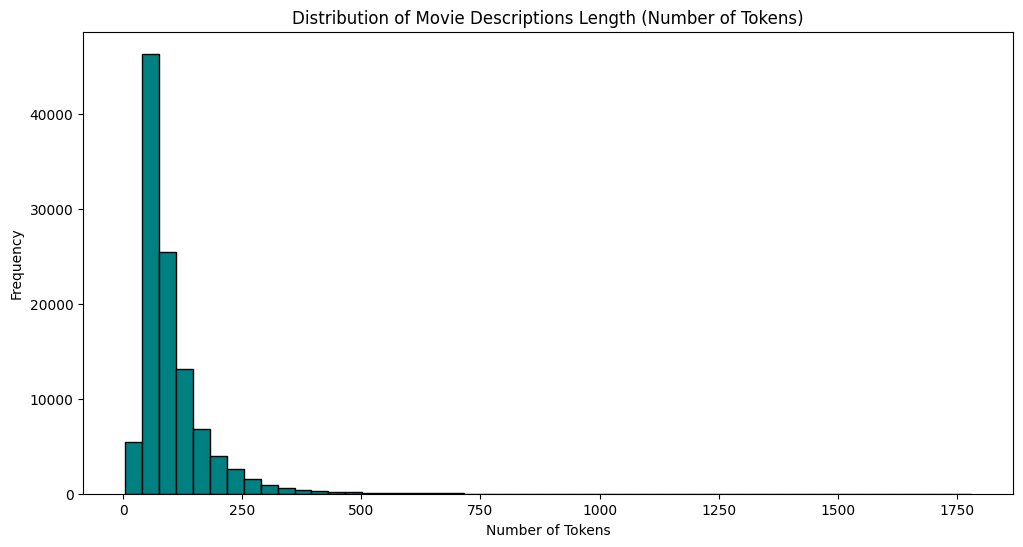

In [18]:
movie_genre_df['TOKENS_COUNT'] = movie_genre_df['TOKENS'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(movie_genre_df['TOKENS_COUNT'], bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Movie Descriptions Length (Number of Tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()


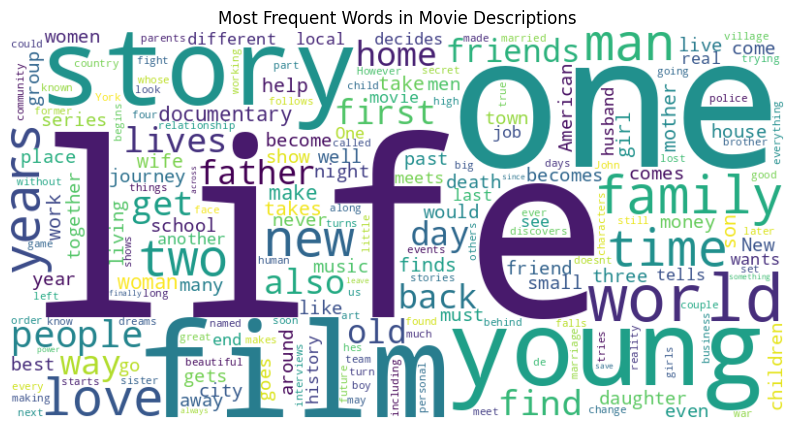

[('life', 33464),
 ('one', 27867),
 ('film', 25214),
 ('story', 19322),
 ('young', 18911),
 ('world', 17995),
 ('family', 17815),
 ('love', 17379),
 ('two', 16477),
 ('time', 16413),
 ('new', 16239),
 ('years', 16056),
 ('man', 16039),
 ('people', 14739),
 ('find', 13080),
 ('get', 12823),
 ('lives', 12659),
 ('first', 12276),
 ('also', 12005),
 ('home', 11678)]

In [19]:
from collections import Counter
from wordcloud import WordCloud

all_tokens = [word for desc in movie_genre_df['DESCRIPTION_NO_STOPWORDS'] for word in desc]
word_freq = Counter(all_tokens)

most_common_words = word_freq.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Words in Movie Descriptions")
plt.axis('off')
plt.show()

most_common_words

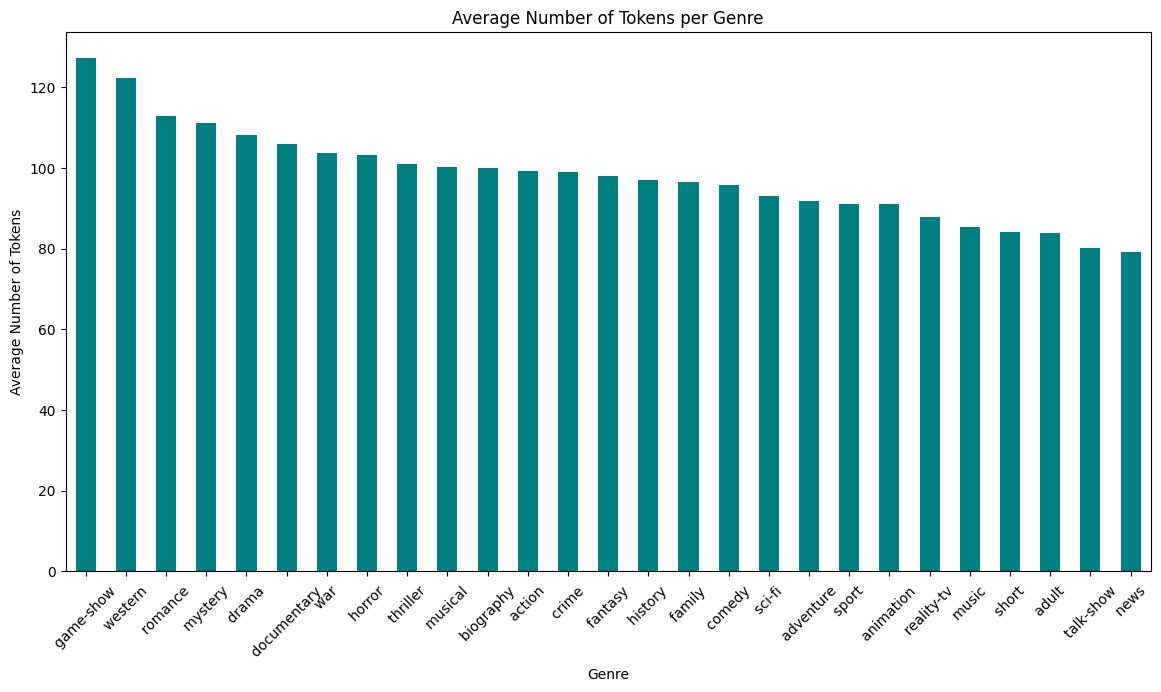

In [20]:
avg_tokens_per_genre = movie_genre_df.groupby("GENRE")["TOKENS_COUNT"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
avg_tokens_per_genre.plot(kind='bar', color='teal')
plt.title("Average Number of Tokens per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Number of Tokens")
plt.xticks(rotation=45)
plt.show()


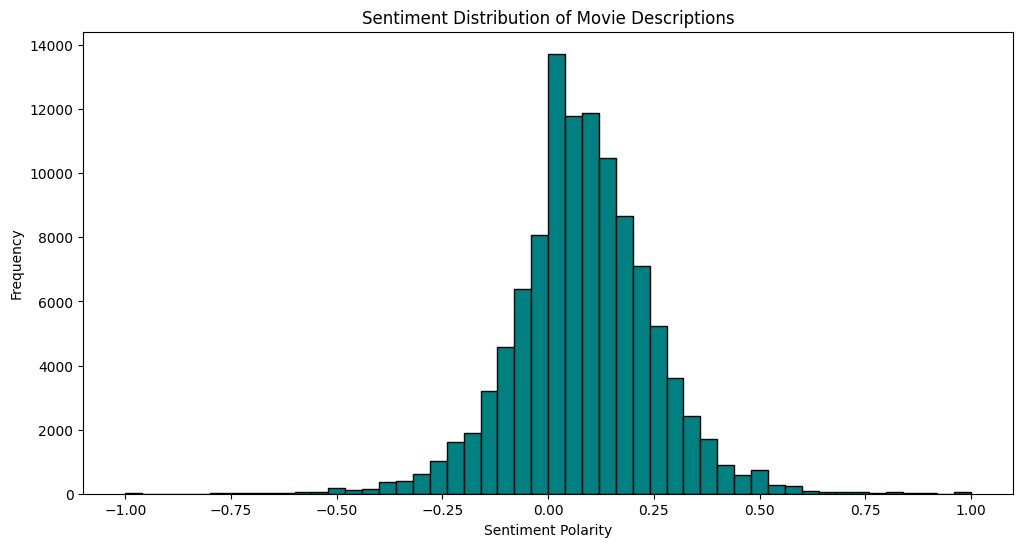

In [21]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

movie_genre_df['SENTIMENT'] = movie_genre_df['DESCRIPTION_CLEAN'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
plt.hist(movie_genre_df['SENTIMENT'], bins=50, color='teal', edgecolor='black')
plt.title("Sentiment Distribution of Movie Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

movie_genre_df['GENRE_ENCODED'] = label_encoder.fit_transform(movie_genre_df['GENRE'])

movie_genre_df[['GENRE', 'GENRE_ENCODED']].head()

,GENRE,GENRE_ENCODED
0,drama,8
1,thriller,24
2,adult,1
3,drama,8
4,drama,8


In [23]:
y = movie_genre_df['GENRE_ENCODED']

In [24]:
import gensim.downloader as api
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


word2vec_model = api.load("word2vec-google-news-300")

def get_word2vec_vector(text, model, vector_size=300):
    """
    Given a text, computes the average of word vectors from Word2Vec embeddings.
    """
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model:
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)


movie_genre_df['WORD2VEC_VECTOR'] = movie_genre_df['LEMMATIZED_DESCRIPTION'].apply(lambda x: get_word2vec_vector(x, word2vec_model))
X_word2vec = np.vstack(movie_genre_df['WORD2VEC_VECTOR'])

y = movie_genre_df['GENRE_ENCODED']

mi_scores = mutual_info_classif(X_word2vec, y)

mi_threshold = 0.02
selected_features = mi_scores >= mi_threshold

X_word2vec_selected = X_word2vec[:, selected_features]

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

smote = SMOTE(random_state=16)
X_resampled, y_resampled = smote.fit_resample(X_word2vec_selected, y)

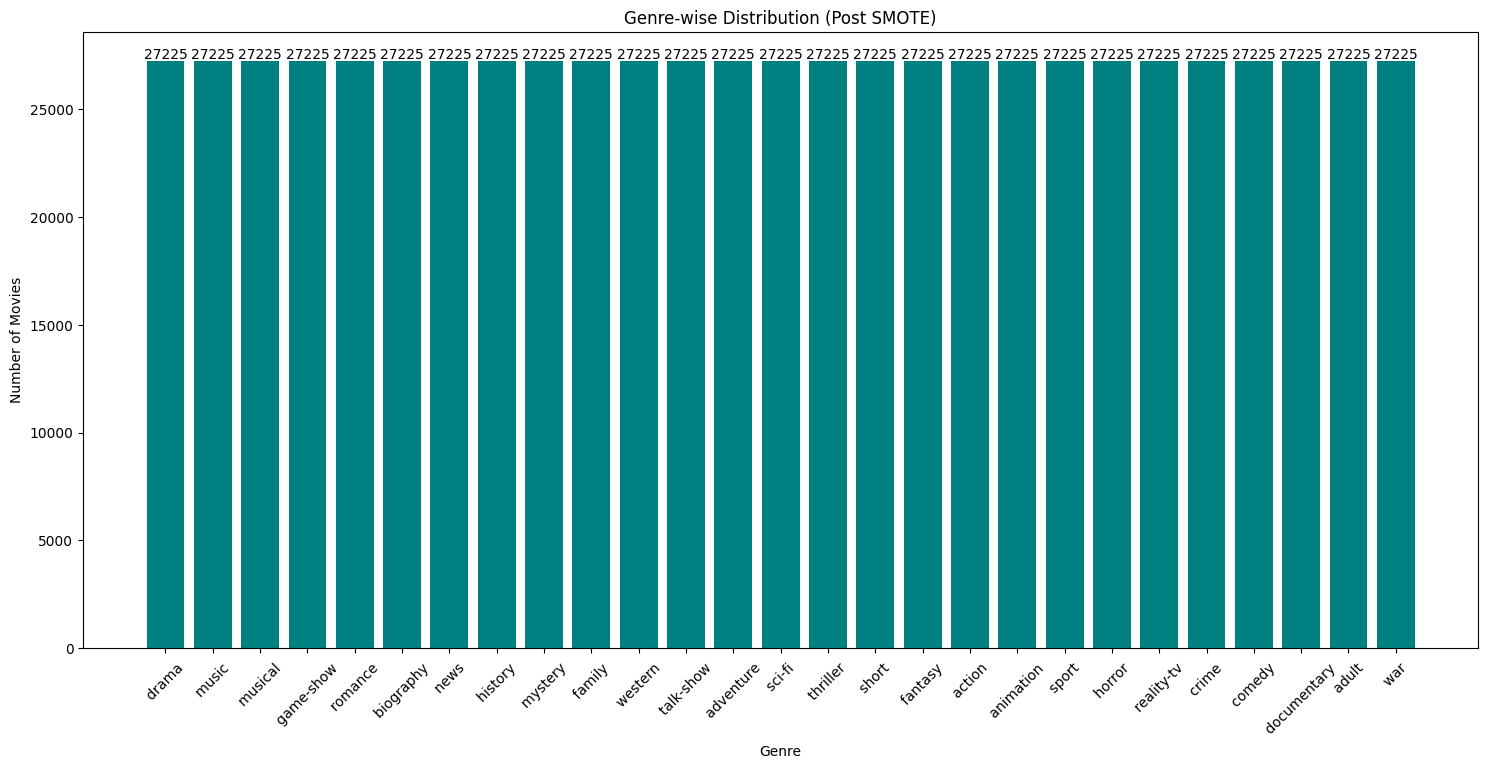

In [26]:
genre_counts_resampled = pd.Series(y_resampled).value_counts()

genre_names = label_encoder.inverse_transform(genre_counts_resampled.index)

plt.figure(figsize=(18, 8))
plt.bar(genre_names, genre_counts_resampled, color="teal")
plt.title("Genre-wise Distribution (Post SMOTE)")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)

for index, value in enumerate(genre_counts_resampled):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=16)

model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.89      0.90      0.89      5456
       adult        0.97      0.99      0.98      5502
   adventure        0.94      0.93      0.94      5469
   animation        0.96      0.97      0.96      5516
   biography        0.97      0.99      0.98      5520
      comedy        0.70      0.65      0.67      5508
       crime        0.94      0.97      0.96      5366
 documentary        0.70      0.65      0.68      5391
       drama        0.58      0.50      0.53      5535
      family        0.92      0.94      0.93      5412
     fantasy        0.96      0.99      0.98      5381
   game-show        1.00      1.00      1.00      5362
     history        0.97      0.99      0.98      5510
      horror        0.90      0.90      0.90      5440
       music        0.96      0.99      0.98      5447
     musical        0.97      0.99      0.98      5390
     mystery        0.97      0.99      0.98      5514
        n

In [28]:
with open('word2vec_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('selected_features.pkl', 'wb') as features_file:
    pickle.dump(selected_features, features_file)

with open('selected_features.pkl', 'wb') as features_file:
    pickle.dump(selected_features, features_file)

In [31]:
def predict_genre(new_data):
    new_data_vector = get_word2vec_vector(new_data, word2vec_model)

    new_data_vector = np.array(new_data_vector).reshape(1, -1)
    new_data_vector = new_data_vector[:, selected_features]
    prediction = model.predict(new_data_vector)

    predicted_genre = label_encoder.inverse_transform(prediction)

    return predicted_genre[0]

In [32]:
new_input = input("Enter a movie description: ")

predicted_class = predict_genre(new_input)
print(f"Predicted Genre: {predicted_class}")

Enter a movie description: In a near future ravaged by drought and dirt storms, a group of space explorers travel through a wormhole to another galaxy to try and find a suitable new home for humankind
Predicted Genre:  sci-fi 


## Trail Methods


In [24]:
import gensim.downloader as api
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 1))

tfidf_matrix = tfidf_vectorizer.fit_transform(movie_genre_df['LEMMATIZED_DESCRIPTION'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

mi_scores = mutual_info_classif(tfidf_matrix, movie_genre_df['GENRE_ENCODED'], discrete_features=True)

mi_scores_df = pd.DataFrame(mi_scores, index=tfidf_vectorizer.get_feature_names_out(), columns=['MI_Score'])

mi_threshold = 0.05
selected_features = mi_scores_df[mi_scores_df['MI_Score'] >= mi_threshold].index

tfidf_df_fs = tfidf_df[selected_features]
tfidf_df_fs.head()

,across,action,adventure,age,along,also,always,american,another,around,...,without,woman,work,working,world,would,year,yet,york,young
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.365238,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.261248,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.091852,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.068071,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.130232,0.0,0.0,0.160373,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

smote = SMOTE(random_state=16)
X_resampled, y_resampled = smote.fit_resample(tfidf_df_fs, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=16)

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.83      0.70      0.76      5456
       adult        0.81      0.89      0.85      5502
   adventure        0.67      0.68      0.68      5469
   animation        0.87      0.82      0.84      5516
   biography        0.83      0.88      0.85      5520
      comedy        0.52      0.40      0.45      5508
       crime        0.79      0.83      0.81      5366
 documentary        0.60      0.56      0.58      5391
       drama        0.46      0.46      0.46      5535
      family        0.72      0.70      0.71      5412
     fantasy        0.94      0.94      0.94      5381
   game-show        0.97      0.98      0.97      5362
     history        0.95      0.97      0.96      5510
      horror        0.76      0.72      0.74      5440
       music        0.81      0.86      0.83      5447
     musical        0.89      0.86      0.87      5390
     mystery        0.96      0.96      0.96      5514
        n

In [29]:
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

with open('tfidf_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [34]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
def get_glove_vector(text, model, vector_size=100):
    """
    Given a text, computes the average of word vectors from GloVe embeddings.
    """
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model:
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

movie_genre_df['GLOVE_VECTOR'] = movie_genre_df['LEMMATIZED_DESCRIPTION'].apply(lambda x: get_glove_vector(x, glove_model))

X_glove = np.vstack(movie_genre_df['GLOVE_VECTOR'])

y = movie_genre_df['GENRE_ENCODED']

mi_scores = mutual_info_classif(X_glove, y)

mi_threshold = 0.02
selected_features = mi_scores >= mi_threshold

X_glove_selected = X_glove[:, selected_features]

In [37]:
smote = SMOTE(random_state=16)
X_resampled, y_resampled = smote.fit_resample(X_glove_selected, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=16)

model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.82      0.81      0.81      5456
       adult        0.92      0.96      0.94      5502
   adventure        0.88      0.85      0.87      5469
   animation        0.91      0.92      0.91      5516
   biography        0.93      0.98      0.95      5520
      comedy        0.60      0.52      0.56      5508
       crime        0.89      0.93      0.91      5366
 documentary        0.65      0.57      0.61      5391
       drama        0.51      0.40      0.45      5535
      family        0.85      0.87      0.86      5412
     fantasy        0.92      0.96      0.94      5381
   game-show        0.99      1.00      1.00      5362
     history        0.94      0.99      0.96      5510
      horror        0.80      0.81      0.81      5440
       music        0.94      0.97      0.96      5447
     musical        0.93      0.98      0.96      5390
     mystery        0.92      0.96      0.94      5514
        n

In [36]:
with open('GloVe_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_df[selected_features]
y = movie_genre_df['GENRE_ENCODED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (86731, 778)
Test set shape: (21683, 778)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.5458654245261264
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.36      0.22      0.27       519
           1       0.60      0.22      0.32       232
           2       0.33      0.10      0.15       298
           3       0.37      0.07      0.12       193
           4       0.00      0.00      0.00        91
           5       0.48      0.50      0.49      2974
           6       0.22      0.06      0.09       204
           7       0.65      0.83      0.72      5230
           8       0.52      0.73      0.61      5452
           9       0.42      0.07      0.12       312
          10       0.17      0.02      0.03       130
          11       0.90      0.52      0.66        90
          12       0.00      0.00      0.00       100
          13       0.56      0.49      0.52       892
          14       0.59      0.42      0.49       313
          15       0.33      0.05     

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.49195222063367616


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Naive Bayes:
                precision    recall  f1-score   support

      action        0.53      0.06      0.11       526
       adult        0.00      0.00      0.00       228
   adventure        0.75      0.01      0.02       304
   animation        0.00      0.00      0.00       211
   biography        0.00      0.00      0.00       103
      comedy        0.51      0.32      0.39      2988
       crime        0.00      0.00      0.00       223
 documentary        0.54      0.85      0.66      5185
       drama        0.43      0.82      0.57      5550
      family        1.00      0.01      0.01       288
     fantasy        0.00      0.00      0.00       147
   game-show        0.90      0.38      0.54        73
     history        0.00      0.00      0.00       116
      horror        0.69      0.22      0.33       883
       music        0.67      0.24      0.35       300
     musical        0.00      0.00      0.00       114
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5598856246829313


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for SVM:
                precision    recall  f1-score   support

      action        0.39      0.28      0.32       526
       adult        0.46      0.26      0.33       228
   adventure        0.35      0.16      0.22       304
   animation        0.37      0.13      0.19       211
   biography        0.00      0.00      0.00       103
      comedy        0.49      0.52      0.50      2988
       crime        0.27      0.03      0.05       223
 documentary        0.67      0.81      0.73      5185
       drama        0.53      0.75      0.62      5550
      family        0.42      0.11      0.17       288
     fantasy        0.61      0.07      0.13       147
   game-show        0.68      0.49      0.57        73
     history        0.00      0.00      0.00       116
      horror        0.59      0.54      0.56       883
       music        0.60      0.51      0.55       300
     musical        0.80      0.04      0.07       114
     mystery        0.33      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
